# Image Classification using MNIST

**Author**: Tianxiang (Adam) Gao <br>
**Course**: CSC 383/483: Applied Deep Learning <br>
**Description**: In this assignment, you will build a simple image classifier for the MNIST handwritten digit dataset using the **Keras deep learning library**. The MNIST dataset consists of 70,000 grayscale images of handwritten digits (0–9), each of size 28×28 pixels.

## Setup

We will first import some useful libraries:
- `numpy` for numerical operations (e.g., arrays, random sampling).
- `keras` for loading the MNIST dataset and building deep learning models.
- `keras.layers` provides the building blocks (dense layers, convolutional layers, activation functions, etc.) to design neural networks.
- `matplotlib` for visualizing images and plotting graphs.

In [2]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

## Prepare the data [10/10]

1. Use `keras.datasets.mnist.load_data()` to load training and testing data. Name them `x_train, y_train, x_test, y_test`. Print the shape of both `x_train` and `x_test` to confirm the number of samples and image dimensions.

2. Convert pixel values from integers in the range 0–255 to floating-point numbers between 0 and 1 (normalize). Use `np.expand_dims(data, -1)` to reshape the arrays so that each image has an explicit channel dimension (since MNIST images are grayscale).

3. Print the first 10 labels from `y_train` to see their raw integer values (0–9). Convert both `y_train` and `y_test` into one-hot encoded vectors using `keras.utils.to_categorical`. Print the first 10 labels again to observe the difference between integer labels and one-hot encoded labels.

In [20]:
num_classes = 10
# input_shape = (28, 28, 1) # 1 channel (grayscale)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("x_train shape:", x_train.shape)
print(f'x_test shape:{x_test.shape} \n')

# explicitly converting into float (standard practice), but x_train / 255 also internally converts into float (works)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(f'x_test shape:{x_test.shape} \n')

print("first 10 labels:", y_train[0:10])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("first 10 labels:", y_train[0:10])

x_train shape: (60000, 28, 28)
x_test shape:(10000, 28, 28) 

x_train shape: (60000, 28, 28, 1)
x_test shape:(10000, 28, 28, 1) 

first 10 labels: [5 0 4 1 9 2 1 3 1 4]
first 10 labels: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Visualize the data [10/10]

4. Randomly pick 9 images from the training set `x_train`. Display them in a 3×3 grid using Matplotlib (`plt.subplot`). For each image, show its corresponding digit label (from `y_train`) as the subplot title.

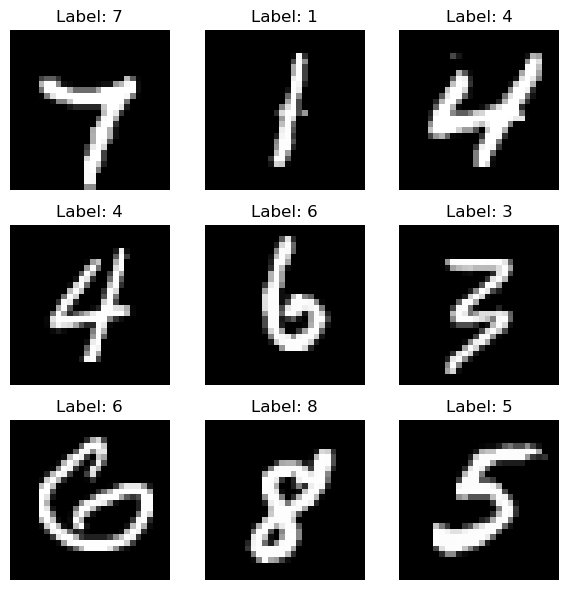

In [50]:
indices = np.random.choice(len(x_train), size=9, replace=False)

plt.figure(figsize=(6, 6))
for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)
    img = np.squeeze(x_train[idx])
    plt.imshow(img, cmap='gray')
    plt.title(f'Label: {np.argmax(y_train[idx])}')
    plt.axis("off")

plt.tight_layout()
plt.show()

## Build the model [50/50]

5. Recall that each MNIST image has shape `(28, 28, 1)` (height, width, and 1 grayscale channel). Assign this shape to a variable `input_shape`.

6. Use `keras.Sequential` to build a simple two-layer MLP with the following layers:
    - Input layer: accepts images of shape `input_shape`.
    - Flatten layer: converts each 2D image into a 1D vector.
    - Dense layer: fully connected layer with 128 hidden units and a `"sigmoid"` activation function.
    - Output layer: fully connected layer with `num_classes` units (one for each digit 0–9) and `"softmax"` activation.

7. Inspect the model: Call `model.summary()` to display the network architecture, output shapes, and number of parameters in each layer.

In [4]:
input_shape = # define input shape

model = keras.Sequential([
    # Input
    # Flatten
    # Dense with "sigmoid"
    # Dense with "softmax"
])

# summary of the model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model [20/20]

8. Set training parameters: Choose a `batch_size` of 128 and train for 20 `epochs`.
    - Batch size controls how many training examples are processed before updating model weights.
    - Epochs represent how many times the model will see the entire training dataset.

9. Compile the model: Use the following components:
    - Loss function: `CategoricalCrossentropy` (since we have multi-class classification with one-hot labels).
    - Optimizer: `SGD` (stochastic gradient descent) with a `learning_rate` of 0.02
    - Metrics: track `CategoricalAccuracy` during training and validation.

10. Train the model
    - Use `model.fit()` with the given batch size and epochs.
    - Set `validation_split=0.1` so that 10% of the training data is held out for validation at the end of each epoch.
    - Observe the training and validation loss/accuracy printed after each epoch.

In [5]:
batch_size =
pochs =

model.compile(
    loss= # CategoricalCrossentropy()
    optimizer= # SGD
    metrics=[
        # CategoricalAccuracy()
    ]
)

model.fit()

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.4257 - loss: 2.0869 - val_categorical_accuracy: 0.7995 - val_loss: 1.3782
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.7783 - loss: 1.2703 - val_categorical_accuracy: 0.8508 - val_loss: 0.8863
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.8221 - loss: 0.8914 - val_categorical_accuracy: 0.8770 - val_loss: 0.6632
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.8481 - loss: 0.6984 - val_categorical_accuracy: 0.8892 - val_loss: 0.5471
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - categorical_accuracy: 0.8576 - loss: 0.6094 - val_categorical_accuracy: 0.8943 - val_loss: 0.4766
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.8705 - loss: 0.5411 - val_categorical_accuracy: 0.9018 - val_loss: 0.4299
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.8752 - los

## Evaluate the trained model on the test set [10/10]

11. After training, use `model.evaluate(x_test, y_test)` to measure how well the model generalizes to unseen data. Store the result in a variable score. Print both the test loss (`score[0]`) and the test accuracy (`score[1]`).

In [6]:
score = # model evaluate
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3149966299533844
Test accuracy: 0.9133999943733215
